# Creating and processing surface meshes
In this notebook we create a surface mesh from a 3D simulated 3D binary image dataset.

In [24]:
import vedo
from skimage.io import imread
from skimage.measure import marching_cubes
import stackview
import os

We start by loading a binary image.

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
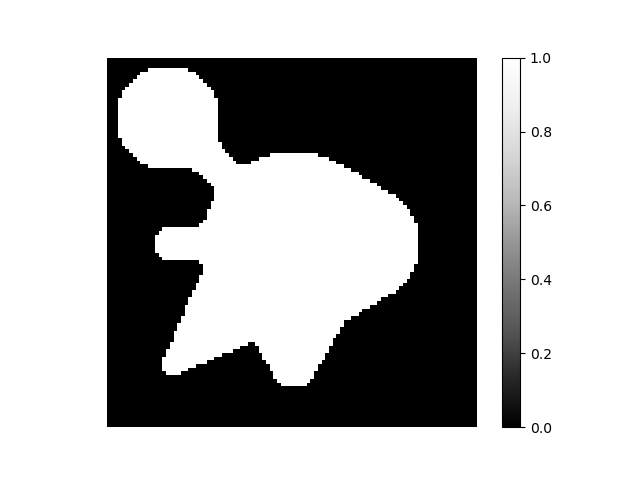
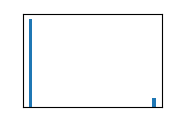

In [2]:
binary_image = imread("data/branchoid.tif")
stackview.insight(binary_image)

## Generating surfaces
We first generate a surface from the binary image. In this case, we take _all_ non-zero labeled pixels and turn them into a surface.


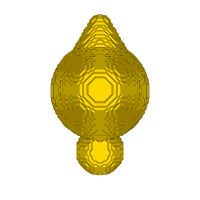

In [3]:
verts, faces, normals, values = marching_cubes(binary_image)

mesh = vedo.mesh.Mesh((verts, faces))
mesh

You can modify the surface mesh, e.g. by rotating it around an axis. Note: This changes all point coordinates in the object. This is an in-place operation.


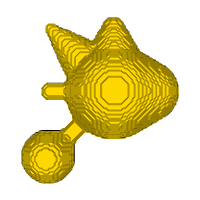

In [4]:
mesh.rotate_y(90)


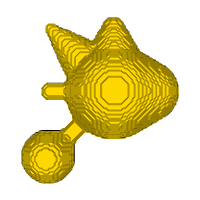

In [5]:
mesh

To prevent modifying the original object, make a copy first.


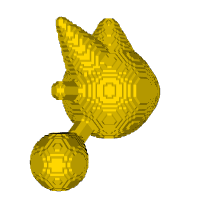

In [6]:
rotated = mesh.copy().rotate_y(angle=45)
rotated


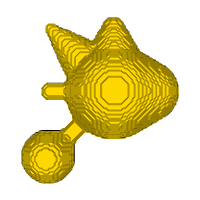

In [7]:
mesh

You can extract vertices and faces like this:

In [8]:
mesh.points

array([[ 47. ,  44. , -25.5],
       [ 46.5,  44. , -26. ],
       [ 47. ,  43.5, -26. ],
       ...,
       [ 51. ,  56. , -74.5],
       [ 52. ,  56. , -74.5],
       [ 53. ,  56. , -74.5]], dtype=float32)

In [9]:
mesh.cells[:10]

[[2, 1, 0],
 [4, 3, 0],
 [0, 3, 2],
 [6, 5, 4],
 [4, 5, 3],
 [8, 7, 6],
 [6, 7, 5],
 [10, 9, 8],
 [8, 9, 7],
 [12, 11, 10]]

# Smoothing surface meshes
As you can see above, the surface mesh has some circular edges. Those are an artifact of the marching-cubes algorithm. We can remove them by smoothing the mesh.


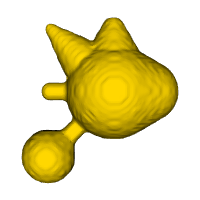

In [10]:
smoothed_mesh = mesh.copy().smooth(niter=15,
                              pass_band=0.1,
                              edge_angle=15,
                              feature_angle=60,
                              boundary=False)

smoothed_mesh


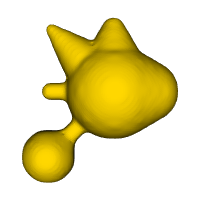

In [27]:
smoothed_mesh = mesh.copy().smooth(niter=15,
                              pass_band=0.0001,
                              edge_angle=15,
                              feature_angle=60,
                              boundary=False)

smoothed_mesh

In [28]:
mesh.smooth?

Signature:
mesh.smooth(
    niter=15,
    pass_band=0.1,
    edge_angle=15,
    feature_angle=60,
    boundary=False,
) -> Self
Docstring:
Adjust mesh point positions using the so-called "Windowed Sinc" method.

Arguments:
    niter : (int)
        number of iterations.
    pass_band : (float)
        set the pass_band value for the windowed sinc filter.
    edge_angle : (float)
        edge angle to control smoothing along edges (either interior or boundary).
    feature_angle : (float)
        specifies the feature angle for sharp edge identification.
    boundary : (bool)
        specify if boundary should also be smoothed or kept unmodified

Examples:
    - [mesh_smoother1.py](https://github.com/marcomusy/vedo/tree/master/examples/advanced/mesh_smoother1.py)

    ![](https://vedo.embl.es/images/advanced/mesh_smoother2.png)
File:      c:\users\rober\miniforge3\envs\bio11\lib\site-packages\vedo\mesh.py
Type:      method

# Simplifying meshes
In case a surface mesh is very big, processing it takes a lot of time. You can simplify the mesh then to make the computation faster.


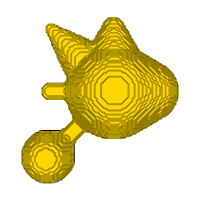

In [13]:
decimated_mesh = mesh.copy().decimate(fraction=0.5)
decimated_mesh


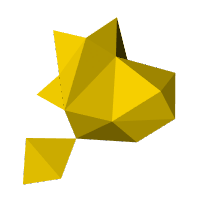

In [16]:
decimated_mesh = mesh.copy().decimate(fraction=0.001)
decimated_mesh

## Measurements
You can measure mesh properties using vedo as well.

In [19]:
mesh.area?

Signature: mesh.area() -> float
Docstring:
Compute the surface area of the mesh.
The mesh must be triangular for this to work.
To triangulate a mesh use `mesh.triangulate()`.
File:      c:\users\rober\miniforge3\envs\bio11\lib\site-packages\vedo\mesh.py
Type:      method

In [17]:
mesh.area()

13667.023042571516

In [18]:
decimated_mesh.area()

10791.316679331192

# Saving meshes


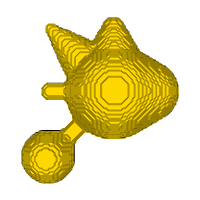

In [20]:
vedo.write(mesh, "data/branchoid_rotated.ply")


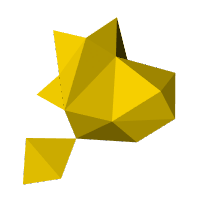

In [21]:
vedo.write(decimated_mesh, "data/branchoid_rotated_decimated.ply")

In [26]:
for filename in ["data/branchoid_rotated.ply", "data/branchoid_rotated_decimated.ply"]:
    print(filename, os.path.getsize(filename) / 1024, "kByte")

data/branchoid_rotated.ply 706.796875 kByte
data/branchoid_rotated_decimated.ply 1.0068359375 kByte


## Exercise
Write a for-loop that decimates the mesh by certain fraction. Write another for-loop that simplifies the mesh using different pass-bands. Plot the surface area over fraction and pass-bands.